In [1]:
import time

import gym
import gym_snake
from ml_tools import q_learning

import matplotlib.pyplot as plt

In [2]:
from brain.brain import Brain

brain = Brain()

In [3]:
agent = q_learning.Agent(
  action_space=[0, 1, 2, 3],

  brain=brain,

  epsilon=1,
  epsilon_decay=0.999995,
  
  discount_factor=0.97,
  
  replay_batch_size=32,
  model_batch_size=16,
  
  model_learning_rate=0.001,

  steps_to_train=50,
  steps_to_update_target=100,

  replay_memory_max_len=50_000,
  replay_memory_min_len= 2_000,
)

env = gym.make('snake-v0')

score = 0
scores = []
game_num = 0

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [4]:
brain.model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 1, 1, 1024)       1529968   
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                             

In [10]:
from ml_tools.ui import UI

ui = UI()
ui.connect("./public")
brain.ui = ui

raw_observation = env.reset()
agent.reset(raw_observation)

while True:
  ui.video.update_stream("raw", raw_observation)

  speed = int(ui.control.get_value('speed') or 100)
  if speed != 100:
    time.sleep(1 / speed)

  agent.training = True if (ui.control.get_value('training') or 'true') == 'true' else False
    
  action = agent.act()
  raw_next_observation, reward, done, info = env.step(action)
  agent.step(reward, raw_next_observation)
  score += reward

  raw_observation = raw_next_observation
  if done:
    scores.append(score)
    score = 0

    game_num += 1

    raw_observation = env.reset()
    agent.reset(raw_observation)

2/2 [==============================] - 1s 607ms/step - loss: 0.0156


Exception in thread Thread-6 (start_reading_loop):
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/ml_tools/ml_tools/ui/service/services.py", line 23, in start_reading_loop
    message = self.protocol.Read()
  File "/Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/ml_tools/ml_tools/ui/protocol.py", line 35, in Read
    return self.decoder.Read()
  File "/Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/ml_tools/ml_tools/ui/protocol.py", line 51, in Read
    n = d.r.recv_into(d.readBuffer)
ConnectionResetError: [Errno 54] Connection reset by peer


2/2 [==============================] - 0s 137ms/step - loss: 0.0078


2/2 [==============================] - 0s 131ms/step - loss: 0.0234


2/2 [==============================] - 0s 136ms/step - loss: 0.0312


2/2 [==============================] - 0s 134ms/step - loss: 0.0156


2/2 [==============================] - 0s 129ms/step - loss: 0.0000e+00


2/2 [==============================] - 0s 132ms/step - loss: 0.0078


2/2 [==============================] - 0s 136ms/step - loss: 0.0156


2/2 [==============================] - 0s 143ms/step - loss: 0.0234


2/2 [==============================] - 0s 159ms/step - loss: 0.0078


2/2 [==============================] - 0s 134ms/step - loss: 0.0078


2/2 [==============================] - 0s 138ms/step - loss: 0.0156


2/2 [==============================] - 0s 160ms/step - loss: 0.0078


2/2 [==============================] - 0s 143ms/step - loss: 0.0078


2/2 [==============================] - 0s 144ms/step - loss: 0.0000e+00


2/2 [==============================] - 0s 148ms/step - loss: 0.0156


2/2 [==============================] - 0s 154ms/step - loss: 0.0312


2/2 [==============================] - 0s 153ms/step - loss: 0.0156


2/2 [==============================] - 0s 162ms/step - loss: 0.0234


2/2 [==============================] - 0s 189ms/step - loss: 0.0156


2/2 [==============================] - 0s 171ms/step - loss: 0.0078


2/2 [==============================] - 0s 161ms/step - loss: 0.0312


2/2 [==============================] - 0s 153ms/step - loss: 0.0000e+00


2/2 [==============================] - 0s 140ms/step - loss: 0.0234


2/2 [==============================] - 0s 159ms/step - loss: 0.0078


2/2 [==============================] - 0s 154ms/step - loss: 0.0078


2/2 [==============================] - 0s 154ms/step - loss: 0.0234


2/2 [==============================] - 0s 126ms/step - loss: 0.0234


2/2 [==============================] - 0s 132ms/step - loss: 0.0234


signal: interrupt


KeyboardInterrupt: 

In [ ]:
brain.save_model()

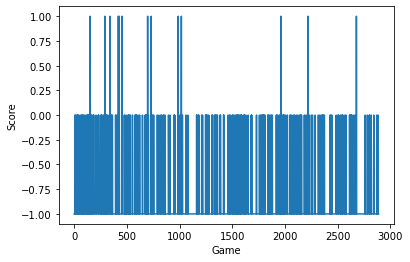

In [9]:
plt.plot(scores)
plt.xlabel("Game")
plt.ylabel("Score")
plt.show()

In [ ]:
agent.epsilon = 0.0005